# Conhecendo a base de dados

## Importando base de dados

In [81]:
import pandas as pd

In [82]:
emissoes_gases = pd.read_excel('1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name = 'GEE Estados')


c:\Users\Cleiton\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning:

Unknown extension is not supported and will be removed



In [83]:
emissoes_gases.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


In [84]:
emissoes_gases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

## Ajustando a base de dados

### Verificando os tipos de emissão que sao usados na tabela

In [85]:
emissoes_gases['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

### Como sao dados de remoção, vomos verificar se todos os valores são negativos

In [86]:
emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção'])]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RR,PEC,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),PA,PEC,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR4,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR6,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [87]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [88]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021].max().unique()

array([0.])

### No caso dos Bunker são emissoes de aeronaves e navios, então não pode ter nenhum estado relacionado

In [89]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'] == 'Bunker', 'Estado'].unique()

array([nan], dtype=object)

### Queremos trabalhar unicamente com os dados de Emissão dos gasses

In [90]:
emissoes_gases = emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'] == 'Emissão']

In [91]:
emissoes_gases.drop(columns= 'Emissão / Remoção / Bunker', inplace= True)

## Agrupando dados

In [92]:
emissoes_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


### Vamos armazenar o nome das colunas que vamos manter

In [93]:
colunas_info = list(emissoes_gases.loc[:, 'Nível 1 - Setor':'Produto'].columns)
colunas_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [94]:
colunas_emissao = list(emissoes_gases.loc[:, 1970:2021].columns)
colunas_emissao

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

### Utilizando o metodo melt para inserir o valor Ano e emissao na tabela como coluna

In [95]:
emissoes_por_ano = emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano' , value_name = 'Emissão')
emissoes_por_ano

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


### Criando uma tabela com os dados de emissao agrupado pelo tipo de gas

In [96]:
emissoes_por_gas = emissoes_por_ano.groupby('Gás').sum(numeric_only=True).sort_values('Emissão', ascending=False)
emissoes_por_gas

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


<Axes: ylabel='Gás'>

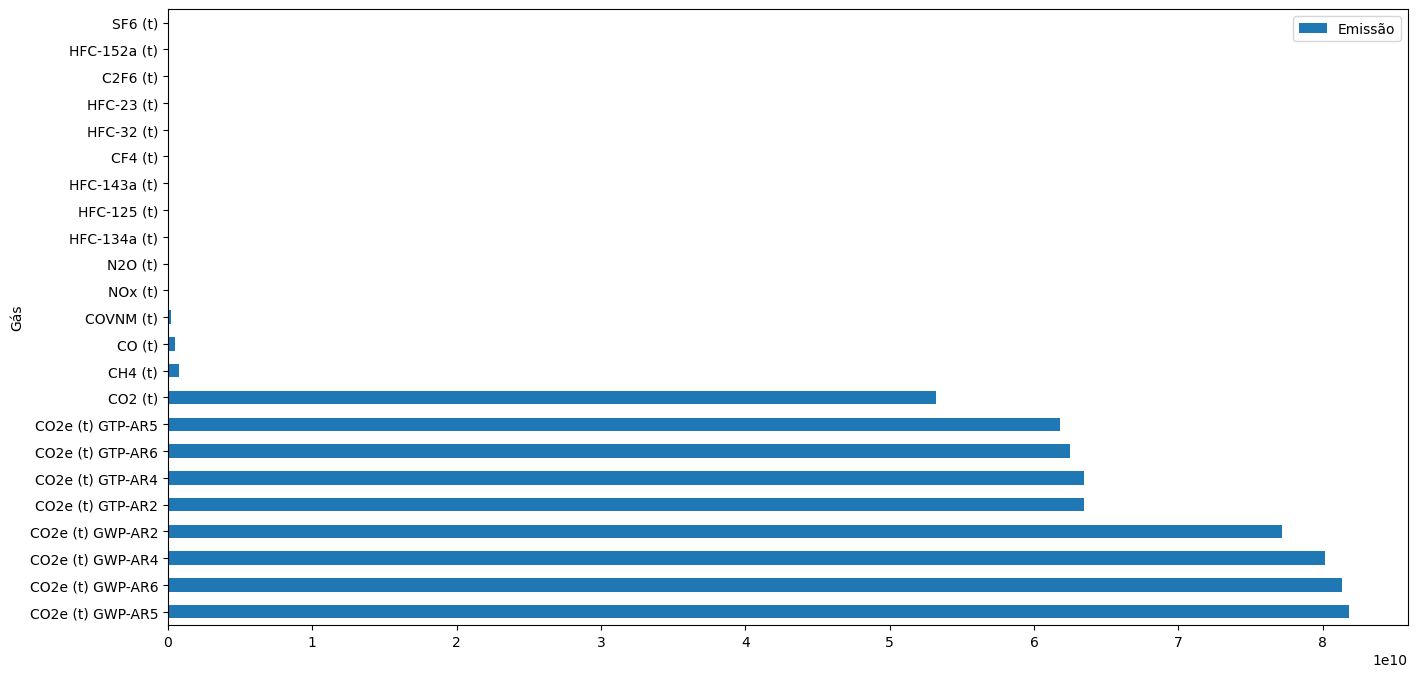

In [97]:
emissoes_por_gas.plot(kind='barh', figsize=(16,8))

In [98]:
print(f'A emissão de CO2 corresponde a {float((emissoes_por_gas.iloc[0:9].sum()/emissoes_por_gas.sum()).iloc[0])*100:.2f} % de emissão total de gases estufa no Brasil de 1970 a 2021.')

A emissão de CO2 corresponde a 99.74 % de emissão total de gases estufa no Brasil de 1970 a 2021.


### Emissao de gas por setor

In [99]:
emissoes_por_ano

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


In [100]:
gas_por_setor = emissoes_por_ano.groupby(['Gás', 'Nível 1 - Setor'])[['Emissão']].sum()
gas_por_setor

Emissão
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
...                                                   ...
N2O (t)  Resíduos                            2.764127e+05
NOx (t)  Agropecuária                        2.602719e+06
         Energia                             9.361215e+07
         Processos Industriais               3.546360e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]

### Usamos o método cross-section ou xs para selecionar apenas os dados do CO2

In [101]:
gas_por_setor.xs('CO2 (t)', level=0)

,Emissão
Nível 1 - Setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


### Agora vomos ver qual e o responsavel pela maior emissao de cada tipo de gas

In [102]:
tabela_sumarizada = gas_por_setor.groupby(level=0).idxmax()
tabela_sumarizada

,Emissão
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


### Para por em apenas uma tabela, vomos pegar o valores maximos por setor

In [103]:
valores_maximos = gas_por_setor.groupby(level=0).max().values
valores_maximos

array([[5.76501774e+02],
       [7.13548128e+03],
       [5.92848132e+08],
       [3.95976946e+08],
       [3.73393003e+10],
       [3.85004383e+10],
       [3.85004383e+10],
       [3.83167456e+10],
       [3.84335874e+10],
       [3.99942414e+10],
       [4.03083713e+10],
       [4.05152299e+10],
       [4.04921633e+10],
       [1.60862332e+08],
       [9.79558000e+03],
       [1.39473100e+05],
       [9.03940000e+03],
       [5.70600000e+02],
       [1.19784000e+03],
       [2.36775000e+03],
       [1.77470246e+07],
       [9.36121468e+07],
       [4.70580000e+02]])

### Agora vomos unir em uma tabela, o setor, o gas e a quatidade emitida

In [104]:
tabela_sumarizada.insert(1, 'Quantidade de emissao', valores_maximos)

In [105]:
tabela_sumarizada

,Emissão,Quantidade de emissao
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


### Agora vomos ver qual o gas mais emitido por setor

In [106]:
gas_por_setor.swaplevel(0, 1).groupby(level=0).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


## Emissoes ao longo dos anos

In [107]:
emissoes_por_ano

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


### Agrupamos por ano e tiramos a media da emissao

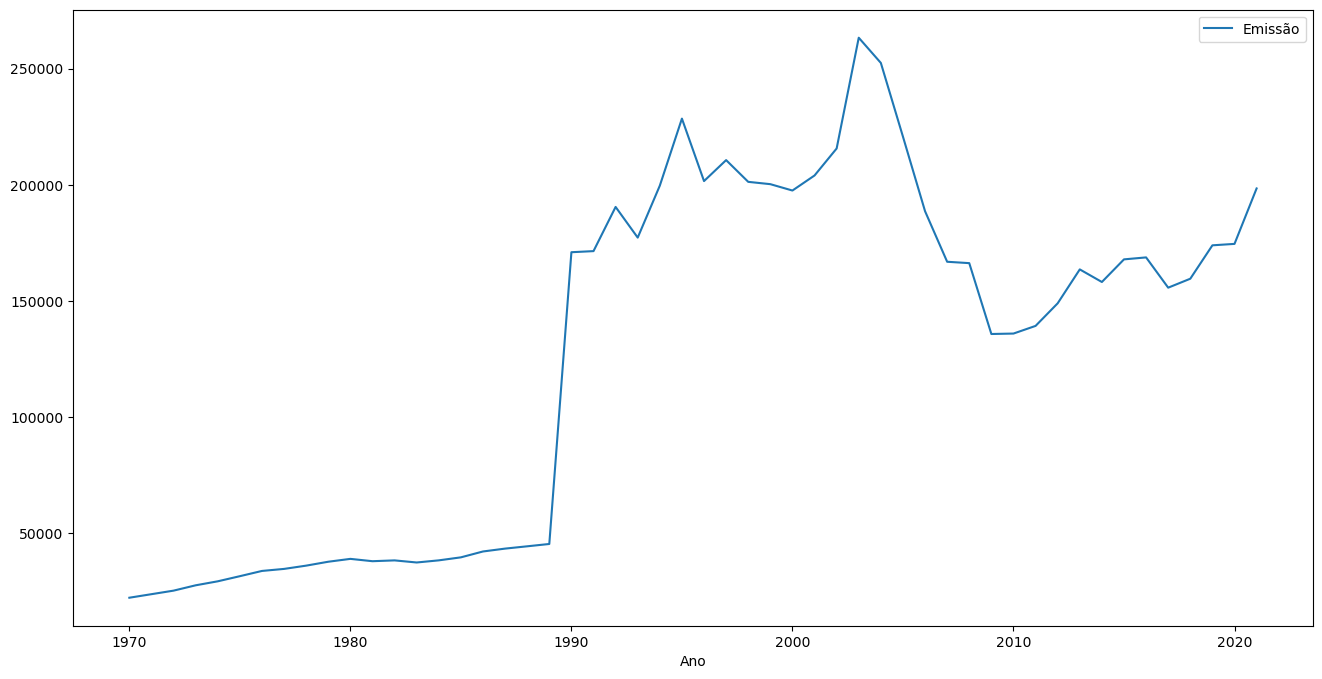

In [108]:
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().plot(figsize=(16, 8));

### Para descobrir o ano com maior emissao usamos o idxmax

In [109]:
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().idxmax()

Emissão    2003
dtype: int64

### Agora usamos o metodo groupby para agrupar os anos e os gasses e calcular a media para cada gas em cada ano

In [110]:
emissoes_por_ano.groupby(['Ano', 'Gás'])[['Emissão']].mean()

Emissão
Ano  Gás                     
1970 C2F6 (t)        0.232610
     CF4 (t)         3.557421
     CH4 (t)      1471.024024
     CO (t)       2155.556658
     CO2 (t)     19244.913199
...                       ...
2021 HFC-23 (t)      0.000000
     HFC-32 (t)    261.100000
     N2O (t)       119.295311
     NOx (t)       679.395431
     SF6 (t)         5.240000

[1196 rows x 1 columns]

### Para podermos criar uma tablea melhor para a plotagem, utilizamos o reset_index()

In [111]:
media_emissao_anual = emissoes_por_ano.groupby(['Ano', 'Gás'])[['Emissão']].mean().reset_index()
media_emissao_anual

,Ano,Gás,Emissão
0,1970,C2F6 (t),0.232610
1,1970,CF4 (t),3.557421
2,1970,CH4 (t),1471.024024
3,1970,CO (t),2155.556658
4,1970,CO2 (t),19244.913199
...,...,...,...
1191,2021,HFC-23 (t),0.000000
1192,2021,HFC-32 (t),261.100000
1193,2021,N2O (t),119.295311
1194,2021,NOx (t),679.395431


### Agora com o pivot_table usamos o ano como index, o gas como colunas e a emissao como valores

In [112]:
media_emissao_anual = media_emissao_anual.pivot_table(index='Ano', columns='Gás', values='Emissão')
media_emissao_anual

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
Ano,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,35396.183865,...,742.074863,0.000000,0.000000,0.000000,0.0,0.00,0.00,31.632709,154.072797,0.000
1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,37570.982886,...,730.119047,0.000000,0.000000,0.000000,0.0,0.00,0.00,32.609237,170.550178,0.000
1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,39800.768350,...,774.278817,0.000000,0.000000,0.000000,0.0,0.00,0.00,34.311864,188.856161,0.000
1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,42947.755490,...,796.866394,0.000000,0.000000,0.000000,0.0,0.00,0.00,35.278689,217.320480,0.000
1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,45431.240064,...,1024.694923,0.000000,0.000000,0.000000,0.0,0.00,0.00,37.098183,247.521415,0.000
1975,0.502952,7.691893,1854.360821,2730.894830,32292.965771,30593.767465,30593.767465,28507.669059,29285.642221,48944.729581,...,1065.682750,0.000000,0.000000,0.000000,0.0,0.00,0.00,39.451008,262.716346,0.000
1976,0.577172,8.826970,1932.641716,2702.494362,35640.344723,33066.878007,33066.878007,30879.481709,31693.226162,52203.028009,...,1091.778909,0.000000,0.000000,0.000000,0.0,0.00,0.00,41.583225,287.013048,0.000
1977,0.692855,10.596169,1931.897645,2675.992077,37313.909077,34182.312333,34182.312333,31967.243034,32784.131397,53333.605735,...,1147.712448,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.571086,292.405821,0.000
1978,0.749660,11.464915,1921.281930,2755.891877,40669.820049,35969.633601,35969.633601,33762.778999,34580.720998,55015.291182,...,1289.853564,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.426649,322.982906,0.000


### Utilizando o subplots, podemos plotar diversos graficos de uma vez so

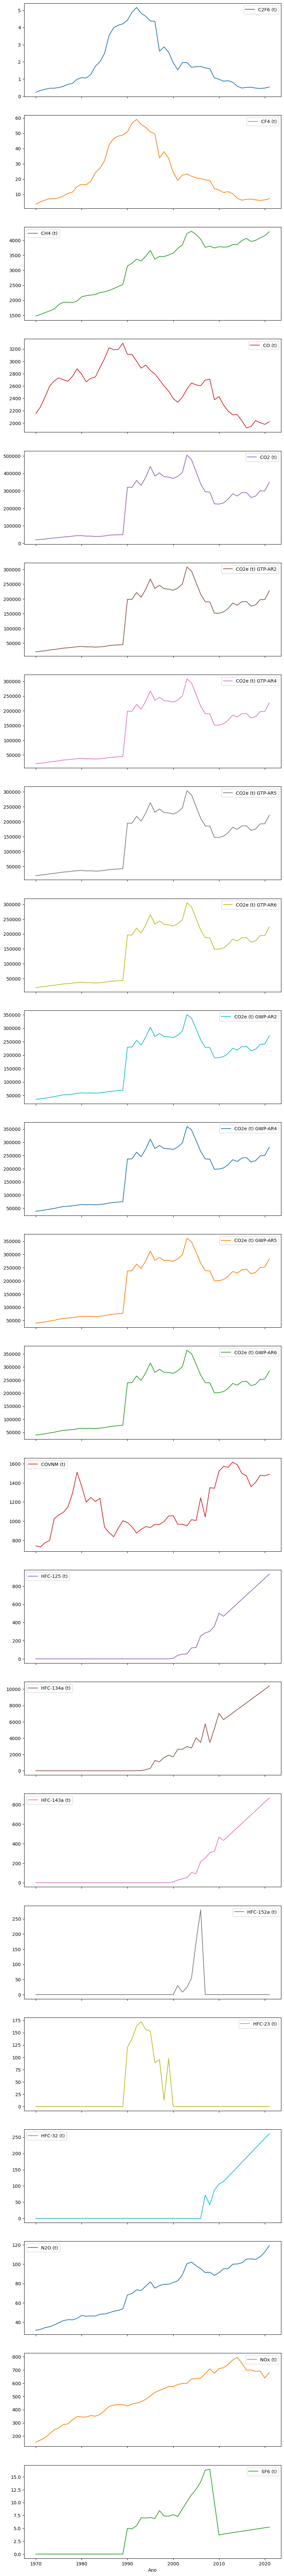

In [113]:
media_emissao_anual.plot(subplots=True, figsize=(10, 100));

## Unindo dados

### Para calcularamos a emissao percapita vomos precisar de mais uma tablea com os dados da populcao

In [114]:
populacao_estados = pd.read_excel('POP2022_Municipios.xls', header = 1, skipfooter = 34)
populacao_estados

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237
...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14046
5566,GO,52,22054,Vicentinópolis,8776
5567,GO,52,22203,Vila Boa,3686
5568,GO,52,22302,Vila Propício,5646


### Como a tabela mostra os dados de cada municipio temos que unir para saber a populacao por estado

In [115]:
populacao_estados.groupby('UF').sum(numeric_only=True)

,COD. UF,COD. MUNIC
UF,,
AC,264,7719
AL,2754,487914
AM,806,134451
AP,256,5908
BA,12093,7151757
CE,4232,1295156
DF,53,108
ES,2496,226710
GO,12792,2788737


### Infelizmente os dados da populacao possuem valores nao numericos, entao precisamos fazer um tratamento

In [116]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na=False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


In [117]:
populacao_estados = populacao_estados.assign(populacao_estados_sem_parentese = populacao_estados['POPULAÇÃO'].replace('\(\d{1,2}\)', '', regex=True), 
                                             populacao = lambda x : x.loc[:, 'populacao_estados_sem_parentese'].replace('\.', '', regex = True))

In [118]:
populacao_estados = populacao_estados.astype({'populacao':'int64'})

In [119]:
populacao_estados = populacao_estados.groupby('UF')[['populacao']].sum().reset_index()
populacao_estados

,UF,populacao
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


### Agora vomos fazer a tabela de emissao apenas para o ano de 2021, dado mais recente da tabela

In [120]:
emissao_estados = emissoes_por_ano[emissoes_por_ano['Ano'] == 2021].groupby('Estado')[['Emissão']].sum().reset_index()
emissao_estados

,Estado,Emissão
0,AC,3.505471e+08
1,AL,6.261279e+07
2,AM,1.189649e+09
3,AP,3.568410e+07
4,BA,5.932251e+08
5,CE,2.034731e+08
6,DF,5.668738e+07
7,ES,2.697547e+08
8,GO,6.008081e+08
9,MA,9.476324e+08


### Usando o metodo merge unimos as duas tabelas para termos uma tabela com a emissao e a populacao de cada estado

In [121]:
dados_agrupados = pd.merge(emissao_estados, populacao_estados, left_on='Estado', right_on='UF')
dados_agrupados

,Estado,Emissão,UF,populacao
0,AC,3.505471e+08,AC,829780
1,AL,6.261279e+07,AL,3125254
2,AM,1.189649e+09,AM,3952262
3,AP,3.568410e+07,AP,774268
4,BA,5.932251e+08,BA,14659023
5,CE,2.034731e+08,CE,8936431
6,DF,5.668738e+07,DF,2923369
7,ES,2.697547e+08,ES,3975100
8,GO,6.008081e+08,GO,6950976
9,MA,9.476324e+08,MA,6800605


In [122]:
dados_agrupados.drop(columns = 'Estado', inplace=True)
dados_agrupados

,Emissão,UF,populacao
0,3.505471e+08,AC,829780
1,6.261279e+07,AL,3125254
2,1.189649e+09,AM,3952262
3,3.568410e+07,AP,774268
4,5.932251e+08,BA,14659023
5,2.034731e+08,CE,8936431
6,5.668738e+07,DF,2923369
7,2.697547e+08,ES,3975100
8,6.008081e+08,GO,6950976
9,9.476324e+08,MA,6800605


<Axes: xlabel='populacao', ylabel='Emissão'>

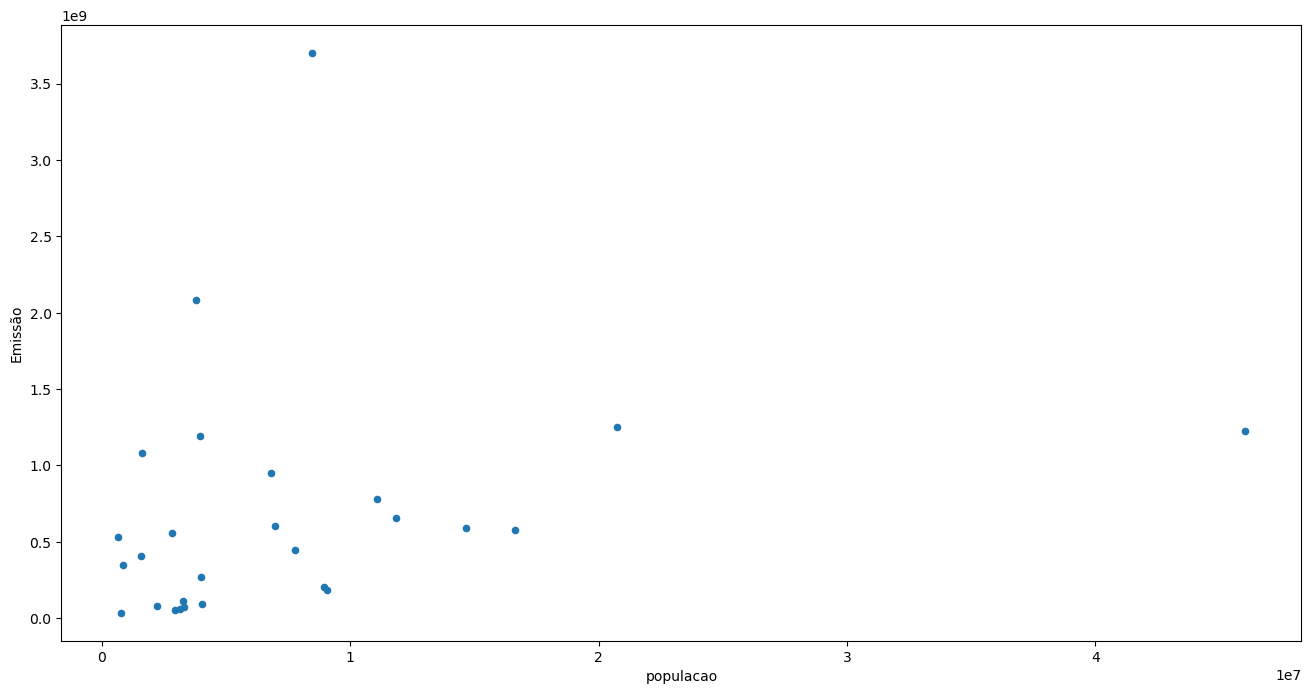

In [123]:
dados_agrupados.plot(x = 'populacao', y='Emissão', kind='scatter',figsize=(16, 8))

### Para criarmos graficos melhores usamos o plotly express

In [124]:
import plotly.express as px

In [125]:
px.scatter(data_frame = dados_agrupados, x = 'populacao', y = 'Emissão', text = 'UF', opacity = 0)

### Usamos o assign para adicionar mais uma coluna com os dados da emissao per capita

In [126]:
dados_agrupados = dados_agrupados.assign(emissao_per_capita = dados_agrupados['Emissão']/dados_agrupados['populacao']).sort_values('emissao_per_capita', ascending=False)
dados_agrupados

,Emissão,UF,populacao,emissao_per_capita
21,5.282071e+08,RR,634805,832.077694
20,1.083515e+09,RO,1616379,670.334662
12,2.081610e+09,MT,3784239,550.073647
13,3.701684e+09,PA,8442962,438.434230
0,3.505471e+08,AC,829780,422.457928
2,1.189649e+09,AM,3952262,301.004463
26,4.082159e+08,TO,1584306,257.662300
11,5.551278e+08,MS,2833742,195.899220
9,9.476324e+08,MA,6800605,139.345312
8,6.008081e+08,GO,6950976,86.435075


In [127]:
px.bar(data_frame=dados_agrupados, x='UF', y='emissao_per_capita')

In [129]:
px.scatter(data_frame = dados_agrupados, x = 'populacao', y = 'Emissão', text = 'UF', size = 'emissao_per_capita')